# Linear Regression and Correlation

## Challenge 1

You are the owner of a big company and you suspect that the younger your employees are, the most likely it is that they don't come to work. In order to prove this hypothesis, you have gathered some data:

| EmployeeID | Age | Absences |
|--------|-----|------------|
| 1      | 27  | 15         |
| 2      | 61  | 6          |
| 3      | 37  | 10         |
| 4      | 23  | 18         |
| 5      | 46  |  9         |
| 6      | 58  |  7         |
| 7      | 29  | 14         |
| 8      | 36  | 11         |
| 9      | 64  |  5         |
| 10     | 40  |  8         |

You can find this information in the `data` folder of the present repository. 

Import the necessary libraries to complete the lab here:

In [4]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### 1. Plot the scatter chart of `Age` and `Absences`. Comment the result. Do you see any relation between `Age` and `Absences`?

In [6]:
EmployeeID = list(range(1,11))
EmployeeID

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [8]:
Absences = [15,6,10,18,9,7,14,11,5,8]

In [7]:
Age = [27,61,37,23,46,58,29,36,64,40]

In [10]:
company_df = pd.DataFrame({'EmployeeId':EmployeeID,'Age':Age,'Absences':Absences})
company_df

,EmployeeId,Age,Absences
0,1,27,15
1,2,61,6
2,3,37,10
3,4,23,18
4,5,46,9
5,6,58,7
6,7,29,14
7,8,36,11
8,9,64,5
9,10,40,8


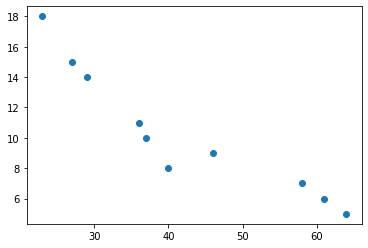

In [14]:
# your code here
plt.scatter(company_df['Age'],company_df['Absences'])
plt.show()

In [15]:
# your comments here
# I looks like there is a correlation. The younger the employee the more absences.

#### 2.- Define a function to calculate the slope and intercept of the regression line for two variables. Your are not allowed to use any functions or methods that directly calculate those parameters.

In [17]:
# your code here
company_df.head(1)

,EmployeeId,Age,Absences
0,1,27,15


In [61]:
def slope_intercept(x,y):
    age_mean = np.mean(x)
    absence_mean = np.mean(y)

    xi_x = np.array([a - np.mean(x) for a in x])
    yi_y = np.array([ab - np.mean(y) for ab in y])

    numerator = np.sum(xi_x*yi_y)

    xi_x2 = np.array([(a - age_mean)**2 for a in x])
    denominator = np.sum(xi_x2)

    slope = numerator/denominator

    intercept = absence_mean - slope*age_mean

    print(f"The slope is:{slope}")
    print(f"The intercept is:{intercept}")

In [62]:
slope_intercept(Age,Absences)

The slope is:-0.2681088337033404
The intercept is:21.58738189891063


#### 3.- Use the function you defined in step 2 to calculate the regression line for `Age` and `Absences`. Plot it and comment your results.

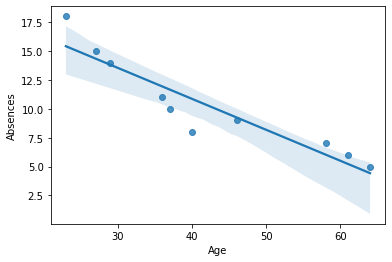

In [33]:
sns.regplot(x='Age',y='Absences',data=company_df)
plt.show()

In [ ]:
# your comments here
# The regression line fits pretty well in the data and it can predict.

#### 4.- Define a function to calculate the covariance and the correlation of two variables.

In [67]:
# your code here
def covariance_r(x,y):
    xi_x = np.array([a - np.mean(x) for a in x])
    yi_y = np.array([ab - np.mean(y) for ab in y])
    # Covariance
    Sxy = np.sum(xi_x*yi_y)/(len(xi_x)-1)
    print(Sxy)
    # Correlation Coefficient
    r =  np.sum(xi_x* yi_y) / np.sqrt(np.sum(xi_x**2)*np.sum(yi_y**2))
    print(r)


#### 5.- Use the function you defined in step 4 to calculate the covariance and the correlation of `Age` and `Absences`. Compare them and comment.

In [68]:
# your code here
covariance_r(Age, Absences)

-57.699999999999996
-0.9325434092481012


In [49]:
# your comments here
# There is a strong negative correlation between Age and Absence

#### 6.- Summarize your results, interpret them and give some insights. Can you confirm that the age is an indicator of absenteeism?

In [50]:
# your comments here
# Yes, after visualizing the data and getting the correlation coefficient between both variables, I can confirm that the correlation existsn and one variable could explain the other.

## Challenge 2

Good Ironhackers stay in campus on Fridays for Ironbeers. You suspect that the more people you tell to stay, the most likely it is that they don't. You want to know if you are the reason why people don't stay so you decide to do an analysis. 

X is the number of people that you told to stay and Y is the number of people that actually stayed.

| X | Y |
|---|---|
| 1 | 1 |
| 3 | 2 |
| 4 | 4 |
| 6 | 4 |
| 8 | 5 |
| 9 | 7 |
| 11 |8 |
| 14 | 9 |

Use the following command to create a dataframe with the data about Ironbeers attendance:

In [52]:
ironbeers_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,9]})
ironbeers_df

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,9


#### 1.- Calculate the covariance and the correlation of `X` and `Y`. Comment on the results.

In [53]:
# your code here
covariance_r(ironbeers_df['X'],ironbeers_df['Y'])

10.5
0.9770084209183942


In [ ]:
# your comments here
# There is a strong positive correlation between X and Y

#### 2.- Plot the scatter chart of `X` and `Y`. Comment on the results.

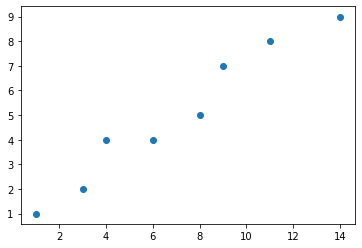

In [56]:
# your code here
plt.scatter(ironbeers_df['X'],ironbeers_df['Y'])
plt.show()

In [ ]:
# your comments here
# We can see that when we increase X, we get bigger values for Y

#### 3.- Calculate the regression line for `X` and `Y`. Commment on the results.

In [63]:
# your code here
slope_intercept(ironbeers_df['X'],ironbeers_df['Y'])

The slope is:0.6363636363636364
The intercept is:0.5454545454545459


In [ ]:
# your comments here
# The regresion line cut the y axis very close to the origen. The regression line has a positive slope.

#### 4.- What is your conclusion? Are you the reason why people is not staying on Fridays?

In [64]:
# your comments here
# Absolutely not. When I mention people to stay, they actually tend to stay.

## Bonus Challenge: Error Analysis

You are going to do an analysis to check whether two random variables fit into a linear regression or not.

In this challenge, you are asked to do an error analysis using the data in **challenge 2**. An "error" is the difference between the expected value of an observation (the regression line value) and the actual value.

#### 1.- First create a new column `expected_Y` in `ironbeers_df` to store the expected `Y` value for each `X`.
**Hint**: You get the expected `Y` by evaluating the regression line for each `X`.

In [77]:
slope = round(0.6363636363636364,2)
slope

0.64

In [79]:
intercept = round(0.5454545454545459,2)
intercept

0.55

In [80]:
ironbeers_df['expected_Y'] = slope * ironbeers_df['X'] + intercept

In [88]:
ironbeers_df

,X,Y,expected_Y
0,1,1,1.19
1,3,2,2.47
2,4,4,3.11
3,6,4,4.39
4,8,5,5.67
5,9,7,6.31
6,11,8,7.59
7,14,9,9.51


#### 2.- Create a new column `error` in `ironbeers_df` to store the error between the actual and expected values of `Y`. Plot the scatter chart of `X` and `error`.

In [91]:
# your code here
ironbeers_df['error'] = ironbeers_df['Y'] - ironbeers_df['expected_Y'] 
ironbeers_df

,X,Y,expected_Y,error
0,1,1,1.19,-0.19
1,3,2,2.47,-0.47
2,4,4,3.11,0.89
3,6,4,4.39,-0.39
4,8,5,5.67,-0.67
5,9,7,6.31,0.69
6,11,8,7.59,0.41
7,14,9,9.51,-0.51


#### 3.- The closer the points to zero, the best the actual values fit the linear regression. Comment the plot above. Do you see any particular points with a high error?

In [ ]:
# your comments here
# Bigger errors appear in the first three rows.

#### 4.- Remove the points with a high error and recalculate the regression line.

In [96]:
# your code here
new_df = ironbeers_df.iloc[3:][['X','Y']]
new_df

,X,Y
3,6,4
4,8,5
5,9,7
6,11,8
7,14,9


In [97]:
slope_intercept(new_df['X'],new_df['Y'])

The slope is:0.6505376344086021
The intercept is:0.35483870967741904


In [98]:
slope = round(0.6505376344086021,2)
slope

0.65

In [99]:
intercept = round(0.35483870967741904,2)
intercept

0.35

In [101]:
new_df['expected_Y'] = slope * new_df['X'] + intercept
new_df

,X,Y,expected_Y
3,6,4,4.25
4,8,5,5.55
5,9,7,6.20
6,11,8,7.50
7,14,9,9.45


#### 5.- Calculate the correlation. What is happening? Comment the result.

In [102]:
# your code here
new_df['error'] = new_df['Y'] - new_df['expected_Y'] 
new_df

,X,Y,expected_Y,error
3,6,4,4.25,-0.25
4,8,5,5.55,-0.55
5,9,7,6.20,0.80
6,11,8,7.50,0.50
7,14,9,9.45,-0.45


In [103]:
# your comments here
# some of the values get adjusted but on the other hand, in other values the error is bigger.

,X,Y,expected_Y,error
0,1,1,1.19,-0.19
1,3,2,2.47,-0.47
2,4,4,3.11,0.89
3,6,4,4.39,-0.39
4,8,5,5.67,-0.67
5,9,7,6.31,0.69
6,11,8,7.59,0.41
7,14,9,9.51,-0.51
